In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving archive (3).zip to archive (3).zip


In [3]:
import zipfile

with zipfile.ZipFile('archive (3).zip', 'r') as zip_ref:
    zip_ref.extractall('/content/ad_dataset')

In [4]:
import os
os.listdir('/content/ad_dataset')

['Advertising And Sales.csv']

In [5]:
df_ad = pd.read_csv('/content/ad_dataset/Advertising And Sales.csv')
df_ad.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,12.8,58.4,12.9


In [6]:
df_ad.drop('ID', axis=1, inplace=True)

X = df_ad[['TV', 'Radio', 'Newspaper']]
y = df_ad['Sales']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
df_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
from sklearn.linear_model import LinearRegression

lr_ad = LinearRegression()
lr_ad.fit(X_train, y_train)

LinearRegression()

In [10]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred_ad = lr_ad.predict(X_test)

r2 = r2_score(y_test, y_pred_ad)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ad))

print(f"R² Score: {r2}")
print(f"RMSE: {rmse}")

R² Score: 0.899969103117516
RMSE: 1.7768890206332153


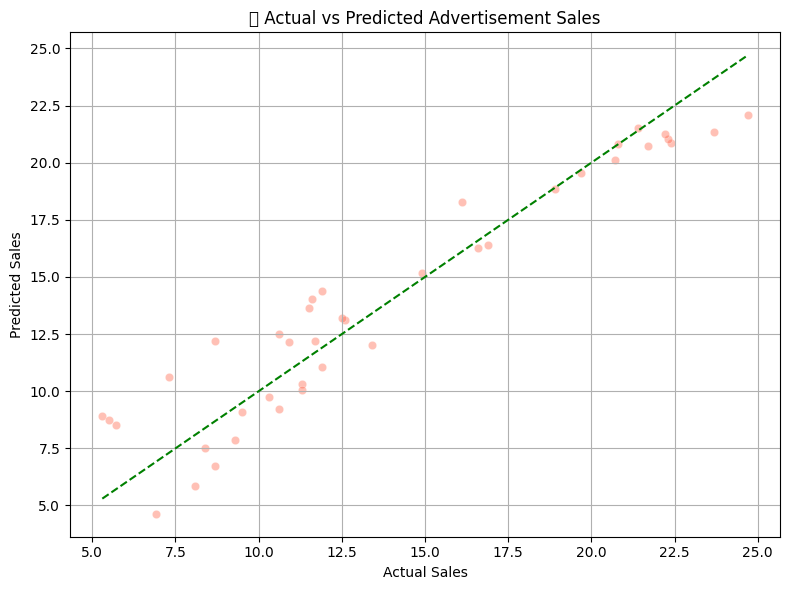

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_ad, alpha=0.4, color='tomato')

plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("📈 Actual vs Predicted Advertisement Sales")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g--')  # ideal line
plt.tight_layout()
plt.show()

Goal of the Project

To predict product sales based on advertisement spending across TV, Radio, and Newspaper platforms using a simple regression model.
This can help marketing teams optimize budgets and focus on the most effective channels to drive sales.

